In [403]:
# _*_ coding: utf-8 _*_
# @Time: 2021/12/09 16:05 
# @Author: yuyongsheng
# @Software: PyCharm
# @Description: 新华医院生脉注射液：计量预测建模40和60mg

In [404]:
# 导入程序包
import pymysql as MySQLDB
import pandas as pd
import numpy as np

import re
import sys
import os
project_path = os.getcwd()

In [405]:
# 字符串转换为时间格式
import datetime
def str_to_datetime(x):
    try:
        a = datetime.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")
        return a
    except:
        return np.NaN

# 数据清洗

In [406]:
df_model=pd.read_excel(project_path+'/data/processed_data/df_1.10.6_人工删除不重要列.xlsx')
if 'Unnamed: 0' in df_model.columns:
    df_model = df_model.drop(['Unnamed: 0'], axis=1)

In [407]:
df_model['日剂量']=df_model['日剂量'].apply(lambda x: 1 if x==60 else 0)

In [408]:
df_model['日剂量'].value_counts()

1    116
0     95
Name: 日剂量, dtype: int64

In [409]:
print(df_model.shape)

(211, 51)


## 删除无关特征

In [410]:
df_model.columns

Index(['受试者编号', '出院诊断', '主要疾病转归_描述', '用药开始时间', '用药结束时间', '用药天数', 'EXDSTXT',
       '日剂量', '冠心病', '肺部感染', '心功能不全', '脑梗死', '房颤', '心肌梗塞', '呼吸系统疾病_label',
       '神经系统疾病_label', '泌尿系统疾病_label', '内分泌和代谢疾病_label', '住院日期', '完成日期',
       '住院时长', '年龄', '性别', '基础疾病', '降脂药', '降血小板药', '红细胞_入院', '血红蛋白_入院',
       '白细胞_入院', '中性粒细胞计数_入院', '血小板_入院', '红细胞压积_入院', 'ALT_入院', 'AST_入院',
       'GGT_入院', '低密度脂蛋白（LDL）_入院', '前白蛋白_入院', '尿素氮（BUN）_入院', '总胆红素（TBil）_入院',
       '甘油三酯_入院', '白蛋白_入院', '直接胆红素（DBil）_入院', '肌酐（Cr）_入院', '胆固醇_入院', '血氯_入院',
       '血钠_入院', '血钾_入院', '高密度脂蛋白胆固醇（HDLC）_入院', 'PT_入院', 'INR_入院', 'APTT_入院'],
      dtype='object')

In [411]:
df_model=df_model.drop(['受试者编号', '出院诊断','主要疾病转归_描述', '用药开始时间', '用药结束时间','用药天数', 'EXDSTXT',
                '冠心病','心功能不全','心肌梗塞', '呼吸系统疾病_label','神经系统疾病_label', '泌尿系统疾病_label', '内分泌和代谢疾病_label',
                        '住院日期', '完成日期', '住院时长', '血钠_入院','血钾_入院','血氯_入院'],axis=1)

In [412]:
df_model

,日剂量,肺部感染,脑梗死,房颤,年龄,性别,基础疾病,降脂药,降血小板药,红细胞_入院,...,总胆红素（TBil）_入院,甘油三酯_入院,白蛋白_入院,直接胆红素（DBil）_入院,肌酐（Cr）_入院,胆固醇_入院,高密度脂蛋白胆固醇（HDLC）_入院,PT_入院,INR_入院,APTT_入院
0,1,0,0,0,64,1,1,1,1,4.09,...,NaN,0.25,38.1,NaN,80.0,4.65,1.55,14.9,1.09,29.9
1,1,0,0,0,61,0,1,0,1,3.53,...,NaN,1.03,38.6,NaN,37.0,NaN,1.04,15.7,1.23,38.8
2,1,0,0,0,60,1,1,0,1,4.70,...,NaN,0.40,45.2,NaN,60.0,4.12,1.11,15.0,1.11,37.9
3,1,0,0,0,71,1,0,0,1,5.35,...,NaN,1.17,35.2,NaN,70.0,3.80,1.03,13.5,1.12,39.2
4,1,0,0,0,48,1,1,1,0,5.19,...,NaN,1.43,42.2,NaN,58.0,5.34,1.63,11.6,1.25,50.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,0,0,0,83,1,1,0,0,3.87,...,22.0,NaN,41.7,0.0,99.5,NaN,NaN,15.2,1.37,31.7
207,0,0,0,0,73,0,1,0,0,3.71,...,16.8,1.70,37.5,5.5,72.0,3.78,1.07,11.3,1.05,27.7
208,1,1,0,0,81,0,0,0,0,4.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.4,1.17,29.6
209,0,0,0,0,89,0,1,0,0,3.47,...,12.3,0.49,35.5,3.6,124.0,4.93,1.64,11.2,1.02,30.6


In [413]:
df_model.shape

(211, 31)

In [414]:
df_model.columns

Index(['日剂量', '肺部感染', '脑梗死', '房颤', '年龄', '性别', '基础疾病', '降脂药', '降血小板药',
       '红细胞_入院', '血红蛋白_入院', '白细胞_入院', '中性粒细胞计数_入院', '血小板_入院', '红细胞压积_入院',
       'ALT_入院', 'AST_入院', 'GGT_入院', '低密度脂蛋白（LDL）_入院', '前白蛋白_入院',
       '尿素氮（BUN）_入院', '总胆红素（TBil）_入院', '甘油三酯_入院', '白蛋白_入院', '直接胆红素（DBil）_入院',
       '肌酐（Cr）_入院', '胆固醇_入院', '高密度脂蛋白胆固醇（HDLC）_入院', 'PT_入院', 'INR_入院',
       'APTT_入院'],
      dtype='object')

In [415]:
corr_result=df_model[['日剂量', '肺部感染', '脑梗死', '房颤', '年龄', '性别', '基础疾病', '降脂药', '降血小板药',
       '红细胞_入院', '血红蛋白_入院', '白细胞_入院', '中性粒细胞计数_入院', '血小板_入院', '红细胞压积_入院',
       'ALT_入院', 'AST_入院', 'GGT_入院', '低密度脂蛋白（LDL）_入院', '前白蛋白_入院',
       '尿素氮（BUN）_入院', '总胆红素（TBil）_入院', '甘油三酯_入院', '白蛋白_入院', '直接胆红素（DBil）_入院',
       '肌酐（Cr）_入院', '胆固醇_入院', '高密度脂蛋白胆固醇（HDLC）_入院', 'PT_入院', 'INR_入院',
       'APTT_入院']].corr()

In [416]:
corr_result[corr_result>0.5].to_excel(project_path+'/data/result/feature_engineering/corr.xlsx')

## 删除缺失超过50%的特征

### 删除列缺失超过50%的列

In [417]:
for i in df_model.columns:
    if df_model[i].isnull().sum()/df_model.shape[0] >= 0.5:
        print(i)
        del df_model[i]

In [418]:
print(df_model.shape)  # (106,101)

(211, 31)


### 删除行缺失超过50%的行

In [419]:
df_model=df_model.reset_index(drop=True)
for i in range(df_model.shape[0]):
    if df_model.loc[i].isnull().sum()/df_model.loc[i].shape[0] >= 0.5:
        print(i)
        df_model.drop([i],axis=0,inplace=True)

58
136


In [420]:
print(df_model.shape) 

(209, 31)


In [421]:
# 删除缺失超过50%的特征
writer=pd.ExcelWriter(project_path+'/data/result/feature_engineering/df_1.3_删除缺失超过50%.xlsx')
df_model.to_excel(writer)
writer.save()

## 删除分类极不平衡的特征

In [422]:
# 保护目标变量、tdm数据
protect_col=['']
for i in [i for i in df_model.columns if i not in protect_col]:
    if df_model[i].nunique() < 2:
        del df_model[i]
        continue
    if df_model[i].nunique() == 2:
        # 如果分类变量中某一变量的占比超过90%，则删除该指标
        num_1 = df_model[i].value_counts()  # df一列中不同变量的数目
        num_2 = num_1.div(df_model.shape[0])  # div除法，所有元素都除以相同数值
        num_3 = num_2.max()  # 取出最大值
        if num_3 >= 0.9:
            print(i)
            del df_model[i]

In [423]:
df_model.shape

(209, 31)

In [424]:
# 删除缺失超过50%的特征
writer=pd.ExcelWriter(project_path+'/data/result/feature_engineering/df_1.4_删除分类极不平衡.xlsx')
df_model.to_excel(writer)
writer.save()

## 过滤异常值

In [425]:
# 过滤异常值，大于正常值超过100倍！
for i in df_model.columns[2:]:
    # 测试特征是否存在异常值
    median_value= max(df_model[i].median(),1)
    max_value = df_model[i].max()
    if max_value >= 100 * median_value:
        print(i)
    df_model[i]=df_model[i].apply(lambda x: np.nan if x<0 or x!=x else np.nan if float(x) >= 100*median_value else x)

低密度脂蛋白（LDL）_入院


In [426]:
df_model.shape

(209, 31)

In [427]:
# 保存特征清洗
writer = pd.ExcelWriter(project_path + '/data/result/feature_engineering/df_1_特征清洗.xlsx')
df_model.to_excel(writer)
writer.save()

# 显著性分析

In [453]:
df_model.columns

Index(['日剂量', '肺部感染', '脑梗死', '房颤', '年龄', '性别', '基础疾病', '降脂药', '降血小板药',
       '红细胞_入院', '血红蛋白_入院', '白细胞_入院', '中性粒细胞计数_入院', '血小板_入院', '红细胞压积_入院',
       'ALT_入院', 'AST_入院', 'GGT_入院', '低密度脂蛋白（LDL）_入院', '前白蛋白_入院',
       '尿素氮（BUN）_入院', '总胆红素（TBil）_入院', '甘油三酯_入院', '白蛋白_入院', '直接胆红素（DBil）_入院',
       '肌酐（Cr）_入院', '胆固醇_入院', '高密度脂蛋白胆固醇（HDLC）_入院', 'PT_入院', 'INR_入院',
       'APTT_入院'],
      dtype='object')

In [454]:
discrete_col=['肺部感染', '脑梗死', '房颤','性别', '基础疾病', '降脂药', '降血小板药']
continuous_col=[x for x in df_model.columns if x not in discrete_col]
continuous_col.remove('日剂量')

## 分类变量显著性分析

In [455]:
# 二分类卡方检验
from scipy.stats import chi2_contingency
feature_list=[]
y_list=[]
t_list=[]
p_list=[]
sig_list=[]
for i in discrete_col:
    print(i)
    result = chi2_contingency(pd.crosstab(df_model['日剂量'],df_model[i]))
    t,p=result[0:2]
    t=round(t,2)
    p=round(p,3)
    feature_list.append(i)
    y_list.append('卡方检验')
    t_list.append(t)
    p_list.append(p)
    if p <=0.05:
        sig='显著'
    else:
        sig='不显著'
    sig_list.append(sig)

肺部感染
脑梗死
房颤
性别
基础疾病
降脂药
降血小板药


In [456]:
df_discrete_sig=pd.DataFrame({'feature':feature_list,
                        '检验指标':y_list,
                        't值':t_list,
                        'p值':p_list,
                        'result':sig_list})

In [457]:
# 分类变量显著性检验
df_discrete_sig.to_excel(project_path+'/data/result/feature_engineering/df_2.1_分类变量显著性检验.xlsx')

In [458]:
df_discrete_sig

,feature,检验指标,t值,p值,result
0,肺部感染,卡方检验,13.02,0.000,显著
1,脑梗死,卡方检验,6.65,0.010,显著
2,房颤,卡方检验,19.82,0.000,显著
3,性别,卡方检验,6.63,0.010,显著
4,基础疾病,卡方检验,1.93,0.164,不显著
5,降脂药,卡方检验,7.53,0.006,显著
6,降血小板药,卡方检验,7.37,0.007,显著


In [459]:
discrete_relate=list(df_discrete_sig[df_discrete_sig.result=='显著']['feature'])

In [460]:
discrete_relate

['肺部感染', '脑梗死', '房颤', '性别', '降脂药', '降血小板药']

In [461]:
list(df_discrete_sig[df_discrete_sig.result=='不显著']['feature'])

['基础疾病']

In [462]:
# 保留业务需要的不显著变量
discrete_relate.extend(['基础疾病'])

## 连续变量显著性分析

In [463]:
from scipy.stats import kstest,shapiro
##检验是否正态
def norm_test(data):
    if len(data) > 30:
        norm, p = kstest(data, 'norm')
    else:
        norm, p = shapiro(data)
    #print(t,p)
    if p>=0.05:
        return True
    else:
        return False

In [464]:
import scipy.stats as st
# 连续变量的显著性检验
def test2(data_b, data_p):
    if norm_test(data_b) and norm_test(data_p):
        x = 1
        y = '独立样本T检验'
        t, p = st.ttest_ind(list(data_b),list(data_p), nan_policy='omit')
    else:
        x = 0
        y = 'Mann-Whitney U检验'
        t,p = st.mannwhitneyu(list(data_b),list(data_p))
    return x,y,t,p

In [465]:
def sig_test(df_high,df_low,list1):

    feature_list=[]  # 特征列表
    y_list=[]  # 显著性检验方法
    t_list=[]  # 统计量
    p_list=[]  # p值
    result_list=[]  # 是否显著
    high_mean_list=[]
    low_mean_list=[]

    for i in list1:
        print(i)
        # 高剂量组统计
        df_high_nt=df_high[df_high[i].notnull()]
        data_high=df_high_nt[i]
        high_mean=round(data_high.mean(),2)
        
        df_low_nt=df_low[df_low[i].notnull()]
        data_low=df_low_nt[i]
        low_mean=round(data_low.mean(),2)

        # 计算高低剂量组显著性差异
        if data_high.shape[0] >= 10 and data_low.shape[0]>=10:
            # 连续变量检验
            x,y,t,p = test2(data_high, data_low)
            t=round(t,2)
            p=round(p,3)
            if p <=0.05:
                sig='显著'
            else:
                sig='不显著'
            # 显著性 
            feature_list.append(i)
            y_list.append(y)
            t_list.append(t)
            p_list.append(p)
            result_list.append(sig)
            high_mean_list.append(high_mean)
            low_mean_list.append(low_mean)

    df_result=pd.DataFrame({'特征':feature_list,
                            '高剂量均值':high_mean_list,
                            '低剂量均值':low_mean_list,
                            '检验指标':y_list,
                            't值':t_list,
                            'p值':p_list,
                            '显著性结果':result_list})
    return df_result

In [466]:
# 提取甲氨蝶呤不同标签
df_MTX_high = df_model[df_model['日剂量']==1]
df_MTX_low = df_model[df_model['日剂量']==0]

In [467]:
# 甲氨蝶呤高低剂量组PSM控制变量统计和显著性检验
df_MTX_PSM_sig = sig_test(df_MTX_high,df_MTX_low,continuous_col)
df_MTX_PSM_sig = df_MTX_PSM_sig.reset_index(drop=True)

年龄
红细胞_入院
血红蛋白_入院
白细胞_入院
中性粒细胞计数_入院
血小板_入院
红细胞压积_入院
ALT_入院
AST_入院
GGT_入院
低密度脂蛋白（LDL）_入院
前白蛋白_入院
尿素氮（BUN）_入院
总胆红素（TBil）_入院
甘油三酯_入院
白蛋白_入院
直接胆红素（DBil）_入院
肌酐（Cr）_入院
胆固醇_入院
高密度脂蛋白胆固醇（HDLC）_入院
PT_入院
INR_入院
APTT_入院


In [468]:
# 保存高低剂量组PSM控制变量统计和显著性检验
writer=pd.ExcelWriter(project_path+r'/data/result/feature_engineering/df_2.2_连续变量相关性分析.xlsx')
df_MTX_PSM_sig.to_excel(writer)
writer.save()

In [469]:
df_MTX_PSM_sig

,特征,高剂量均值,低剂量均值,检验指标,t值,p值,显著性结果
0,年龄,66.54,76.26,Mann-Whitney U检验,2971.5,0.000,显著
1,红细胞_入院,4.40,4.19,Mann-Whitney U检验,2556.0,0.000,显著
2,血红蛋白_入院,132.09,117.61,Mann-Whitney U检验,3071.0,0.000,显著
3,白细胞_入院,9.17,7.74,Mann-Whitney U检验,3376.0,0.000,显著
4,中性粒细胞计数_入院,74.07,66.58,Mann-Whitney U检验,3488.5,0.000,显著
5,血小板_入院,200.06,186.42,Mann-Whitney U检验,4238.5,0.014,显著
6,红细胞压积_入院,39.74,34.48,Mann-Whitney U检验,2675.5,0.000,显著
7,ALT_入院,39.84,37.51,Mann-Whitney U检验,2700.5,0.000,显著
8,AST_入院,105.95,47.69,Mann-Whitney U检验,2035.0,0.000,显著
9,GGT_入院,54.69,39.03,Mann-Whitney U检验,1567.0,0.027,显著


In [470]:
continuous_relate = list(df_MTX_PSM_sig[df_MTX_PSM_sig['显著性结果']=='显著']['特征'])

In [471]:
continuous_relate

['年龄',
 '红细胞_入院',
 '血红蛋白_入院',
 '白细胞_入院',
 '中性粒细胞计数_入院',
 '血小板_入院',
 '红细胞压积_入院',
 'ALT_入院',
 'AST_入院',
 'GGT_入院',
 '低密度脂蛋白（LDL）_入院',
 '前白蛋白_入院',
 '尿素氮（BUN）_入院',
 '白蛋白_入院',
 '肌酐（Cr）_入院',
 '胆固醇_入院',
 'PT_入院',
 'INR_入院',
 'APTT_入院']

In [472]:
list(df_MTX_PSM_sig[df_MTX_PSM_sig['显著性结果']=='不显著']['特征'])

['总胆红素（TBil）_入院', '甘油三酯_入院', '直接胆红素（DBil）_入院', '高密度脂蛋白胆固醇（HDLC）_入院']

In [473]:
# 业务角度需要保留：日剂量、age、MTX_tdm_24h、MTX_tdm_48h、MTX_tdm_72h
continuous_relate.extend(['甘油三酯_入院', '高密度脂蛋白胆固醇（HDLC）_入院'])

In [474]:
len(continuous_relate)

21

In [475]:
# 提取相关性特征
feature_relate=discrete_col + continuous_relate
# 加入目标变量
feature_relate.insert(0,'日剂量')
df_model_relate=df_model[feature_relate]

In [476]:
df_model_relate.shape

(209, 29)

In [477]:
# 保存显著性分析结果
writer = pd.ExcelWriter(project_path + '/data/result/feature_engineering/df_2_显著性清洗.xlsx')
df_model_relate.to_excel(writer)
writer.save()

# 逐步向前

## 插补数据

In [478]:
# 使用随机森林对缺失值进行插补
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def missing_value_interpolation(df):
    df = df.reset_index(drop=True)
    # 提取存在缺失值的列名
    missing_list = []
    for i in df.columns:
        if df[i].isnull().sum() > 0:
            missing_list.append(i)
    missing_list_copy = missing_list.copy()
    # 用该列未缺失的值训练随机森林，然后用训练好的rf预测缺失值
    for i in range(len(missing_list)):
        name=missing_list[0]
        df_missing = df[missing_list_copy]
        # 将其他列的缺失值用0表示。
        missing_list.remove(name)
        for j in missing_list:
            df_missing[j]=df_missing[j].astype('str').apply(lambda x: 0 if x=='nan' else x)
        df_missing_is = df_missing[df_missing[name].isnull()]
        df_missing_not = df_missing[df_missing[name].notnull()]
        y = df_missing_not[name]
        x = df_missing_not.drop([name],axis=1)
        # 列出参数列表
        tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
        # 进行参数的搜索组合
        grid = GridSearchCV(RandomForestRegressor(),param_grid=tree_grid_parameter,cv=3)
        #rfr=RandomForestRegressor(random_state=0,n_estimators=100,n_jobs=-1)
        #根据已有数据去拟合随机森林模型
        grid.fit(x, y)
        rfr = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'])
        rfr.fit(x, y)
        #预测缺失值
        predict = rfr.predict(df_missing_is.drop([name],axis=1))
        #填补缺失值
        df.loc[df[name].isnull(),name] = predict
    return df

In [479]:
df_model_relate.shape

(209, 29)

In [480]:
# df_model_cb=missing_value_interpolation(df_model_importance)
df_model_cb=df_model_relate

## 划分数据集

In [481]:
from sklearn.model_selection import train_test_split
# 划分训练集和测试集，比例为8:2
x = df_model_cb.drop(['日剂量'],axis=1)
y = df_model_cb['日剂量']

tran_x, test_x, tran_y, test_y = train_test_split(x, y, test_size=0.2, random_state=5)

In [482]:
tran_x.shape

(167, 28)

In [346]:
tran_y

39     0
55     0
40     1
54     1
48     1
      ..
146    0
119    0
191    1
208    1
100    0
Name: 日剂量, Length: 167, dtype: int64

## stepwise forward

In [483]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

r2_max_list=[]
feature_max_list=[]
for i in range(1,tran_x.shape[1]+1):
    # 津源xgboost模型
    sfs = SFS(xgboost.XGBClassifier(max_depth=5,
                        learning_rate=0.01,
                        n_estimators=300,
                        min_child_weight=0.5,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=10,
                        subsample=0.5,
                        colsample_bytree=0.8,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3),
              n_jobs=-1, # 并行使用的进程数，默认1个，如果设置为-1，该值为总的核数
              k_features=i,
             forward=True,
             floating=False,  
             verbose=2,  # 显示输出的一些参数，默认为0不输出
             scoring='accuracy', # for binary targets
             cv=3)  # cv交叉验证

    sfs = sfs.fit(tran_x, tran_y)
    # 逐步向前筛选结果，包括特征个数，最优特征组合及其r2
    sfs_result = sfs.subsets_
    df_sfs = pd.DataFrame(sfs_result)
    # 逐步向前结果
    r2_list=list(df_sfs.loc['avg_score'])
    feature_list=list(df_sfs.loc['feature_names'])
    # 保存特征组合
    r2_max_list.append(r2_list[-1])
    feature_max_list.append(feature_list[-1])
#     if i==4:
#         break

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    7.9s finished

[2022-05-06 17:47:33] Features: 1/1 -- score: 0.6823593073593073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    5.3s finished

[2022-05-06 17:47:39] Features: 1/2 -- score: 0.6823593073593073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    4.9s finished

[2022-05-06 17:47:44] Features: 2/2 -- score: 0.7364718614718614[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | 

[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    4.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    4.6s finished

[2022-05-06 17:50:12] Features: 5/8 -- score: 0.7964285714285714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    4.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    4.4s finished

[2022-05-06 17:50:16] Features: 6/8 -- score: 0.7845238095238095[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    4.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    4.5s finished

[2022-05-06 17:50:21] Features: 7/8 -- score: 0.7904761904761907[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    4.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  21 out of  

[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    3.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    3.9s finished

[2022-05-06 17:52:28] Features: 8/11 -- score: 0.7905844155844156[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    3.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.8s finished

[2022-05-06 17:52:32] Features: 9/11 -- score: 0.7965367965367967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    3.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    3.7s finished

[2022-05-06 17:52:36] Features: 10/11 -- score: 0.7906926406926407[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    3.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  18 out 

[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    4.9s finished

[2022-05-06 17:54:32] Features: 1/14 -- score: 0.6823593073593073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    4.7s finished

[2022-05-06 17:54:37] Features: 2/14 -- score: 0.7364718614718614[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    4.9s finished

[2022-05-06 17:54:42] Features: 3/14 -- score: 0.7784632034632035[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    4.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.8s finished

[2022-05-06 17:54:46] Features: 4/14 -- score: 0.7964285714285714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concur

[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    4.9s finished

[2022-05-06 17:56:32] Features: 1/16 -- score: 0.6823593073593073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    4.7s finished

[2022-05-06 17:56:37] Features: 2/16 -- score: 0.7364718614718614[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    4.9s finished

[2022-05-06 17:56:42] Features: 3/16 -- score: 0.7784632034632035[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    4.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.9s finished

[2022-05-06 17:56:47] Features: 4/16 -- score: 0.7964285714285714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concur

[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    1.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.5s finished

[2022-05-06 17:58:37] Features: 14/17 -- score: 0.8024891774891776[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    3.1s finished

[2022-05-06 17:58:41] Features: 15/17 -- score: 0.8025974025974026[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    1.8s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    2.9s finished

[2022-05-06 17:58:44] Features: 16/17 -- score: 0.7906926406926407[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.6s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  12 ou

[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    3.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    4.0s finished

[2022-05-06 18:00:34] Features: 8/19 -- score: 0.7905844155844156[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    3.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.8s finished

[2022-05-06 18:00:38] Features: 9/19 -- score: 0.7965367965367967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    3.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    3.7s finished

[2022-05-06 18:00:42] Features: 10/19 -- score: 0.7906926406926407[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    3.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  18 out 

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.5s finished

[2022-05-06 18:02:16] Features: 17/20 -- score: 0.7965367965367967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    1.6s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    1.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    2.3s finished

[2022-05-06 18:02:18] Features: 18/20 -- score: 0.8024891774891776[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished

[2022-05-06 18:02:20] Features: 19/20 -- score: 0.7965367965367965[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    1.6s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   9 ou

[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    4.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.8s finished

[2022-05-06 18:03:57] Features: 4/22 -- score: 0.7964285714285714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    4.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    4.4s finished

[2022-05-06 18:04:02] Features: 5/22 -- score: 0.7964285714285714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    4.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    4.2s finished

[2022-05-06 18:04:06] Features: 6/22 -- score: 0.7845238095238095[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    4.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  22 out o

[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    3.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    3.7s finished

[2022-05-06 18:05:38] Features: 10/23 -- score: 0.7906926406926407[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    3.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.7s finished

[2022-05-06 18:05:42] Features: 11/23 -- score: 0.7845238095238095[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    3.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    3.6s finished

[2022-05-06 18:05:46] Features: 12/23 -- score: 0.7965367965367965[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    3.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  16 ou

[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    2.8s finished

[2022-05-06 18:07:13] Features: 15/24 -- score: 0.8025974025974026[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    1.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    2.6s finished

[2022-05-06 18:07:16] Features: 16/24 -- score: 0.7906926406926407[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.4s finished

[2022-05-06 18:07:18] Features: 17/24 -- score: 0.7965367965367967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    1.6s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done   8 ou

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    2.3s finished

[2022-05-06 18:08:39] Features: 18/25 -- score: 0.8024891774891776[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished

[2022-05-06 18:08:42] Features: 19/25 -- score: 0.7965367965367965[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    1.6s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    2.1s finished

[2022-05-06 18:08:44] Features: 20/25 -- score: 0.7786796536796537[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    1.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   8 ou

[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    1.6s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.6s finished

[2022-05-06 18:10:06] Features: 21/26 -- score: 0.7846320346320347[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    1.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    1.4s finished

[2022-05-06 18:10:07] Features: 22/26 -- score: 0.7786796536796537[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.2s finished

[2022-05-06 18:10:09] Features: 23/26 -- score: 0.7847402597402597[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 ou

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.3s finished

[2022-05-06 18:11:29] Features: 23/27 -- score: 0.7847402597402597[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished

[2022-05-06 18:11:30] Features: 24/27 -- score: 0.7846320346320347[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished

[2022-05-06 18:11:31] Features: 25/27 -- score: 0.7727272727272728[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 ou

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished

[2022-05-06 18:12:52] Features: 24/28 -- score: 0.7846320346320347[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished

[2022-05-06 18:12:53] Features: 25/28 -- score: 0.7727272727272728[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished

[2022-05-06 18:12:53] Features: 26/28 -- score: 0.7726190476190476[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s finished

[2022-05-06 18:12:54] Features: 27/28 -- sc

In [484]:
df_forward_result=pd.DataFrame(data={'auc':r2_max_list,
                                    'feature_names':feature_max_list})

In [485]:
df_forward_result.shape

(28, 2)

In [486]:
# 保存模型测试和测试结果到本地文件
df_forward_result.to_excel(project_path + '/data/result/feature_engineering/df_3.3_逐步向前特征测试结果.xlsx')

In [487]:
df_forward_result =pd.read_excel(project_path +'/data/result/feature_engineering/df_3.3_逐步向前特征测试结果.xlsx')
if 'Unnamed: 0' in df_forward_result.columns:
    df_forward_result = df_forward_result.drop(['Unnamed: 0'], axis=1)

## 逐步向前画图

In [488]:
df_forward_result.head()

,auc,feature_names
0,0.682359,"('前白蛋白_入院',)"
1,0.736472,"('血红蛋白_入院', '前白蛋白_入院')"
2,0.778463,"('血红蛋白_入院', 'GGT_入院', '前白蛋白_入院')"
3,0.796429,"('肺部感染', '血红蛋白_入院', 'GGT_入院', '前白蛋白_入院')"
4,0.796429,"('肺部感染', '基础疾病', '血红蛋白_入院', 'GGT_入院', '前白蛋白_入院')"


In [489]:
f1_max_list=list(df_forward_result['auc'])
feature_max_list=list(df_forward_result['feature_names'])

([<matplotlib.axis.XTick at 0x2147f39db00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

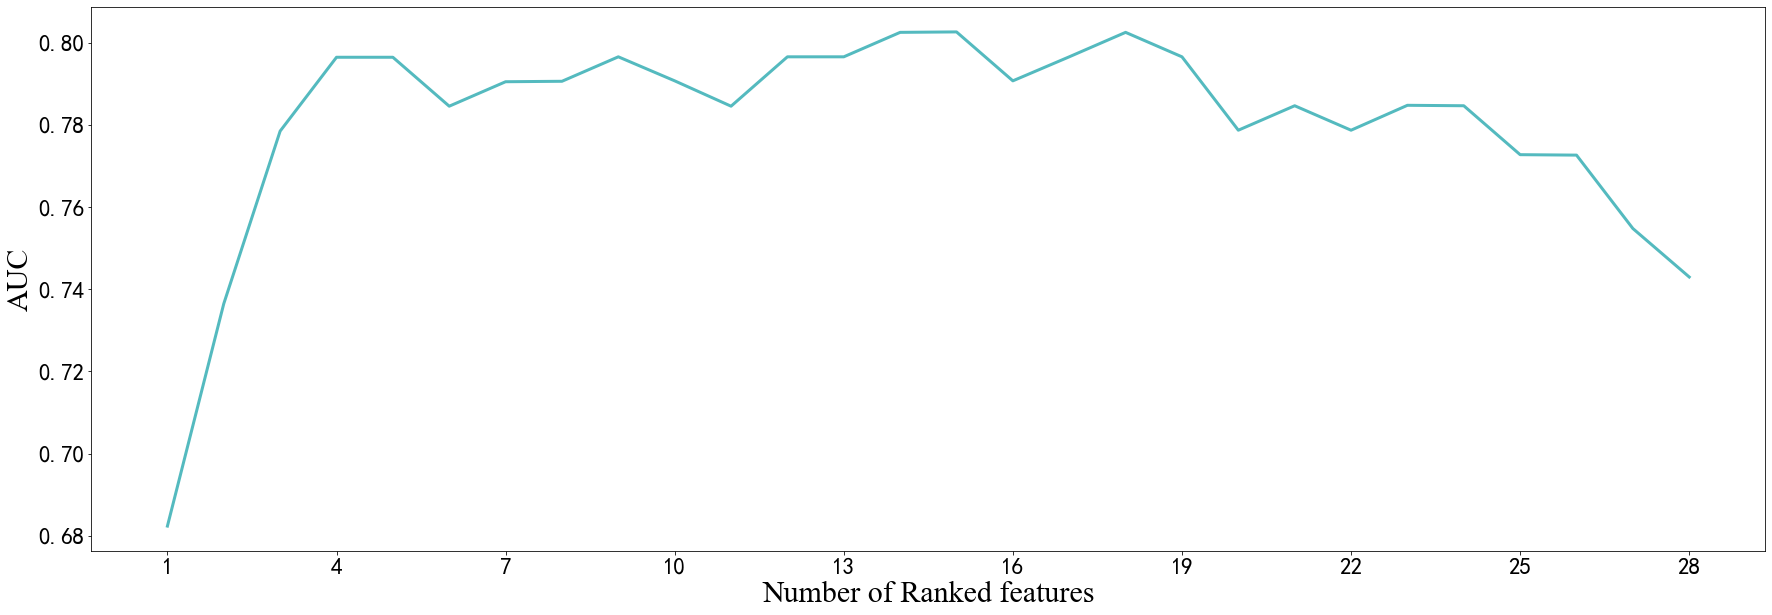

In [490]:
# 画图
# 如果模型画图不好，可以选择在excel中画图
import matplotlib.pyplot as plt
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc
rc('mathtext', default='regular')


# r2折线图
# 分辨率参数-dpi，画布大小参数-figsize
plt.figure(figsize=(30,10))
plt.plot(list(range(1,len(f1_max_list)+1)),f1_max_list,
         color=(0.32941176470588235, 0.7294117647058823, 0.7490196078431373), label='AUC',linewidth=3) # 线粗细
# 设置坐标刻度值的大小
plt.tick_params(labelsize=23)

# 设置横纵坐标标题的名称以及对应字体格式
font_x = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 30,}
plt.xlabel('Number of Ranked features',font_x)
plt.ylabel('AUC',font_x)

# 设置横纵坐标刻度范围、间隔、名称
# x_list=list(df_feature['特征'])
plt.xticks(range(1,len(f1_max_list)+1,3))
# plt.yticks(list(range(len(f1_list))),f1_list,rotation=285)
# plt.legend(bbox_to_anchor=(1.1,1))  # 显示图例

## 保存逐步向前筛选的建模数据

In [491]:
f1_max_index=f1_max_list.index(max(f1_max_list))
print(f1_max_index)
feature_com_best=df_forward_result.loc[f1_max_index,'feature_names']
print(feature_com_best)

14
('肺部感染', '脑梗死', '房颤', '基础疾病', '降脂药', '降血小板药', '血红蛋白_入院', '白细胞_入院', '中性粒细胞计数_入院', '血小板_入院', 'ALT_入院', 'GGT_入院', '前白蛋白_入院', '甘油三酯_入院', '高密度脂蛋白胆固醇（HDLC）_入院')


In [500]:
feature_list=str(feature_com_best).split('\'')
feature_forward_select=feature_list[1:-1:2]
# 查找文献，判断变量是否与目标变量相关
del_col=['红细胞压积_入院','肺部感染','房颤','血小板_入院']
feature_forward_select=[i for i in feature_forward_select if i not in del_col]
feature_forward_select.insert(0,'日剂量')

In [501]:
len(feature_forward_select)

13

In [502]:
feature_forward_select

['日剂量',
 '脑梗死',
 '基础疾病',
 '降脂药',
 '降血小板药',
 '血红蛋白_入院',
 '白细胞_入院',
 '中性粒细胞计数_入院',
 'ALT_入院',
 'GGT_入院',
 '前白蛋白_入院',
 '甘油三酯_入院',
 '高密度脂蛋白胆固醇（HDLC）_入院']

In [503]:
df_model_forward=df_model[feature_forward_select]

In [389]:
df_model_forward.to_excel(project_path+'/data/result/feature_engineering/df_3.5_model_data_forward.xlsx')

# 重要性评分

In [504]:
df_model_forward.shape

(209, 13)

In [505]:
from sklearn.model_selection import train_test_split

# 划分训练集和测试集，比例为8:2
x = df_model_forward.drop(['日剂量'],axis=1)
y = df_model_forward['日剂量']
tran_x, test_x, tran_y, test_y = train_test_split(x, y, test_size=0.2, random_state=5)

# 重要性
import catboost,xgboost
model_boost=xgboost.XGBClassifier(max_depth=5,
                                learning_rate=0.01,
                                n_estimators=500,
                                min_child_weight=0.5,
                                eta=0.1,
                                gamma=0.5,
                                reg_lambda=10,
                                subsample=0.5,
                                colsample_bytree=0.8,
                                nthread=4,
                                scale_pos_weight=1)
model_boost.fit(tran_x,tran_y)
importance = model_boost.feature_importances_
print(tran_x.columns)
print(importance)

Index(['脑梗死', '基础疾病', '降脂药', '降血小板药', '血红蛋白_入院', '白细胞_入院', '中性粒细胞计数_入院',
       'ALT_入院', 'GGT_入院', '前白蛋白_入院', '甘油三酯_入院', '高密度脂蛋白胆固醇（HDLC）_入院'],
      dtype='object')
[0.05611512 0.04545644 0.09044243 0.0820558  0.12630692 0.0773149
 0.07004839 0.06713375 0.13642552 0.1021859  0.0650392  0.08147561]


In [506]:
df_importance= pd.DataFrame(data={'特征':tran_x.columns,'重要性评分':importance})
df_importance['重要性评分']=df_importance['重要性评分'].apply(lambda x: round(x,3))
df_importance=df_importance.sort_values(['重要性评分'],ascending=False)
df_importance=df_importance.reset_index(drop=True)

In [507]:
df_importance

,特征,重要性评分
0,GGT_入院,0.136
1,血红蛋白_入院,0.126
2,前白蛋白_入院,0.102
3,降脂药,0.090
4,降血小板药,0.082
5,高密度脂蛋白胆固醇（HDLC）_入院,0.081
6,白细胞_入院,0.077
7,中性粒细胞计数_入院,0.070
8,ALT_入院,0.067
9,甘油三酯_入院,0.065


In [384]:
df_importance.to_excel(project_path + '/data/result/feature_engineering/df_4_模型重要性评分.xlsx')

In [ ]:
# # 筛选重要特征组建建模数据
# df_importance_select=df_importance[df_importance['重要性评分']>0]
# select_list = list(df_importance_select['特征'])
# select_list.insert(0,'日剂量')

# df_model_importance = df_model_relate[select_list]

# df_model_importance.shape

# # 保存重要性评分筛选后的建模数据
# writer = pd.ExcelWriter(project_path + '/data/result/feature_engineering/df_3_model_data_importance.xlsx')
# df_model_importance.to_excel(writer)
# writer.save()